In [2]:
#import necessary modules
#Python >= 3.5
import sys
assert sys.version_info >= (3, 5)

#Scikit-Learn >= 0.20
import sklearn as sk
assert sk.__version__ >= "0.20"

#numpy for calculations
import numpy as np
import os

#matplotlib for figures
import matplotlib as mpl
import matplotlib.pyplot as plt
#a magic function that allows inline plotting so figures are rendered in this notebook
%matplotlib inline

#pandas for ...
import pandas as pd
from pandas.plotting import scatter_matrix

#add other needed modules here
#Tensorflow?

## Setup and Feature Statistics

In [40]:
# load data from the cv file using pandas
scores = pd.read_csv("Complete MCAT Data.csv", header = 1)
scores.rename(columns = {'Days Before Exam':'Days Before Exam.0'}, inplace = True)

# preview first five lines
scores.head()

,Timestamp,Exam Date,Real Score,C/P Score,CARS Score,B/B Score,P/S Score,Days Before Exam.0,Total Score,C/P Score.1,...,C/P Score.3,CARS Score.3,B/B Score.3,P/S Score.3,Days Before Exam.3,Total Score.3,C/P Score.4,CARS Score.4,B/B Score.4,P/S Score.4
0,2/19/2020 2:17:07,1/18/2020,513.0,128.0,128.0,129.0,128.0,NaN,NaN,NaN,...,128.0,128.0,128.0,126.0,16,506,127,127,125,127
1,2/19/2020 2:32:30,1/17/2020,495.0,122.0,127.0,122.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/19/2020 2:32:57,1/18/2020,522.0,130.0,129.0,131.0,132.0,5.0,519.0,129.0,...,NaN,NaN,NaN,NaN,512,NaN,NaN,NaN,NaN,NaN
3,2/19/2020 2:37:04,1/17/2020,515.0,128.0,129.0,128.0,130.0,7.0,515.0,129.0,...,127.0,127.0,129.0,127.0,28,506,127,125,127,127
4,2/19/2020 2:37:05,1/17/2020,522.0,131.0,131.0,130.0,130.0,8.0,519.0,131.0,...,130.0,129.0,130.0,131.0,15,519,129,130,129,131


In [42]:
# drop irrelevant columns
scores.drop(columns=['Timestamp', 'Exam Date', 'Total Score', 'Total Score.1', 'Total Score.2', 'Total Score.3'], inplace = True)

# sanity check: take a look at the data
print('Scores data shape:', scores.shape)

# print number of columns, column labels, column data types, memory usage, range index, and non-null number of cells in each column
scores.info()

# look at distribution of scores
scores['Real Score'].value_counts()

# gives count, mean, standard deviation, min, max, and percentiles (including median)
scores.describe(percentiles = [0.25, 0.5, 0.75], include = 'all')

Scores data shape: (4996, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Real Score          4948 non-null   float64
 1   C/P Score           4947 non-null   float64
 2   CARS Score          4947 non-null   float64
 3   B/B Score           4947 non-null   float64
 4   P/S Score           4947 non-null   float64
 5   Days Before Exam.0  1733 non-null   float64
 6   C/P Score.1         1502 non-null   float64
 7   CARS Score.1        1498 non-null   float64
 8   B/B Score.1         1496 non-null   float64
 9   P/S Score.1         1496 non-null   float64
 10  Days Before Exam.1  2567 non-null   float64
 11  C/P Score.2         2330 non-null   float64
 12  CARS Score.2        2329 non-null   float64
 13  B/B Score.2         2327 non-null   float64
 14  P/S Score.2         2331 non-null   float64
 15  Days Before Exam.2  3303 

,Real Score,C/P Score,CARS Score,B/B Score,P/S Score,Days Before Exam.0,C/P Score.1,CARS Score.1,B/B Score.1,P/S Score.1,...,Days Before Exam.2,C/P Score.3,CARS Score.3,B/B Score.3,P/S Score.3,Days Before Exam.3,C/P Score.4,CARS Score.4,B/B Score.4,P/S Score.4
count,4948.000000,4947.000000,4947.000000,4947.000000,4947.000000,1733.000000,1502.000000,1498.000000,1496.000000,1496.000000,...,3303,3044.000000,3043.000000,3042.000000,3042.000000,3340,3544,3543,3541,3544
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,166,NaN,NaN,NaN,NaN,242,17,17,18,18
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21,NaN,NaN,NaN,NaN,28,130,128,130,129
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,333,NaN,NaN,NaN,NaN,269,676,799,796,812
mean,515.914511,128.947847,128.163331,129.123711,129.598949,8.417773,129.312250,128.403872,129.037433,129.328877,...,NaN,128.729632,128.400920,128.880342,127.856673,NaN,NaN,NaN,NaN,NaN
std,23.805011,6.247823,6.283536,6.259038,6.196021,16.390119,1.996091,2.083215,1.835347,1.885376,...,NaN,1.988670,2.358199,1.905568,1.745526,NaN,NaN,NaN,NaN,NaN
min,417.000000,30.000000,29.000000,30.000000,29.000000,0.000000,120.000000,120.000000,122.000000,122.000000,...,NaN,118.000000,118.000000,118.000000,118.000000,NaN,NaN,NaN,NaN,NaN
25%,512.000000,128.000000,127.000000,128.000000,128.000000,4.000000,128.000000,127.000000,128.000000,128.000000,...,NaN,127.000000,127.000000,128.000000,127.000000,NaN,NaN,NaN,NaN,NaN
50%,517.000000,129.000000,128.000000,129.000000,130.000000,6.000000,130.000000,129.000000,129.000000,130.000000,...,NaN,129.000000,129.000000,129.000000,128.000000,NaN,NaN,NaN,NaN,NaN
75%,520.000000,130.000000,130.000000,131.000000,131.000000,7.000000,131.000000,130.000000,130.000000,131.000000,...,NaN,130.000000,130.000000,130.000000,129.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# plot some data statistics for the report
# for report: (state the number of datapoints, briefly describe the dataset)

## Visualize and Handle Missing Data

In [ ]:
import missingno as msno

# look at how many values are missing in each dataframe column
missing_values_table(scores)

# visualize missing data with Missingno
msno.bar(scores)
msno.matrix(scores)

# see if there is a reason for missing data
msno.heatmap(scores)
msno.dendrogram(scores)

# for linear regression, drop all rows with missing values
scores.dropna(axis = 0, inplace = True)

## Clean Data and Add New Features

In [72]:
# drop rows with # negative values
#                # days before exam > 180
#                # exact duplicate values to another row
#                # impossible scores (>528 total or >132 on any subsection)

remove_indices = []
remove_indices.extend(scores[scores['Real Score']>528].index.values)
remove_indices.extend(scores[scores['Real Score']<472].index.values)
for i in range(1, 5):
    remove_indices.extend(scores[scores['Days Before Exam.'+str(i)]>200].index.values)
    remove_indices.extend(scores[scores['C/P Score.'+str(i)]>200].index.values)
    remove_indices.extend(scores[scores['CARS Score.'+str(i)]>200].index.values)
    remove_indices.extend(scores[scores['B/B Score.'+str(i)]>200].index.values)
    remove_indices.extend(scores[scores['P/S Score.'+str(i)]>200].index.values)

remove_indices = list(dict.fromkeys(remove_indices))

for i in remove_indices:
    scores.drop(i, axis = 0, inplace = True)

scores.info()
scores.head()

# add custom attribute: variance between test scores (if multiple test scores)
# NOTE: make sure variance is calculated between different te

TypeError: '>' not supported between instances of 'str' and 'int'

## Create a Test Set

In [66]:
blank_scores = scores.drop(columns = ["Real Score","Days Before Exam.0","Days Before Exam.1","Days Before Exam.2","Days Before Exam.3"])
blank_scores = blank_scores.fillna(0) #remove this
blank_scores.head(-5)

,C/P Score,CARS Score,B/B Score,P/S Score,C/P Score.1,CARS Score.1,B/B Score.1,P/S Score.1,C/P Score.2,CARS Score.2,B/B Score.2,P/S Score.2,C/P Score.3,CARS Score.3,B/B Score.3,P/S Score.3,C/P Score.4,CARS Score.4,B/B Score.4,P/S Score.4
0,128.0,128.0,129.0,128.0,0.0,0.0,0.0,0.0,128.0,128.0,129.0,129.0,128.0,128.0,128.0,126.0,127,127,125,127
1,122.0,127.0,122.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,130.0,129.0,131.0,132.0,129.0,129.0,129.0,132.0,132.0,129.0,132.0,129.0,0.0,0.0,0.0,0.0,0,0,0,0
3,128.0,129.0,128.0,130.0,129.0,128.0,128.0,130.0,127.0,126.0,128.0,130.0,127.0,127.0,129.0,127.0,127,125,127,127
4,131.0,131.0,130.0,130.0,131.0,129.0,128.0,131.0,131.0,128.0,128.0,131.0,130.0,129.0,130.0,131.0,129,130,129,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,127.0,125.0,131.0,128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129,126,125,126
4987,129.0,125.0,128.0,128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127,124,129,126
4988,127.0,125.0,129.0,127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128,127,127,127
4989,132.0,124.0,131.0,131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130,126,131,129


In [67]:
# define features and labels from the observations
N = 2000
X = blank_scores.values
y = scores["Real Score"]
print(X.shape,y.shape)

(4996, 20) (4996,)


In [68]:
from sklearn.model_selection import train_test_split

#split data into training and testing, fix random_state so output is the same every run
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True,
                                   test_size=0.33, random_state=0)

#sanity check: look at how many data points are in train/test
print(X_train.shape[0])
print(X_val.shape[0])
print(X_train)

3347
1649
[[125.0 127.0 123.0 ... '125' '123' '125']
 [126.0 126.0 124.0 ... 0 0 0]
 [128.0 128.0 127.0 ... '127' '126' '128']
 ...
 [129.0 128.0 128.0 ... '127' '129' '130']
 [130.0 127.0 129.0 ... '129' '129' '127']
 [129.0 130.0 130.0 ... '129' '127' '130']]


In [69]:
#sanity check: preview test and training data
train_set.head()
test_set.head()

NameError: name 'train_set' is not defined

In [58]:
from sklearn.model_selection import StratifiedShuffleSplit

#perform stratified shufflesplit cross-validator
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
#compares random and stratified error

## Visualize Correlations

In [70]:
# create a correlation matrix with pandas
corr_matrix["Real Score"].sort_values(ascending=False)

# create scatter matrices displaying totals, medians.
from pandas.plotting import scatter_matrix

attributes = ["Real Score", ..., ..., ...]
scatter_matrix(scores[attributes], figsize=(12, 8))

NameError: name 'corr_matrix' is not defined

## PCA to Create Linear Combinations of Features

In [71]:
from sklearn.decomposition import PCA

# This code is from Assignment 2

# fit the PCA
N = 8
pca = PCA(n_components=N)
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.fit_transform(X_val)

# plot the explained variances
fig, ax1 = plt.subplots(figsize=(12, 5))
color = 'tab:blue'
ax1.bar(1+np.arange(N), pca.explained_variance_ratio_, color=color)
ax1.set_xticks(1+np.arange(N, step=2))
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel("Explained variance ratio", color=color)
ax1.set_xlabel("Generated feature")

ax2 = ax1.twinx()
color = 'tab:red'
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(1+np.arange(N), np.cumsum(pca.explained_variance_ratio_), color=color)
ax2.set_ylabel("Cumulative explained variance ratio", color=color)
fig.tight_layout()
plt.show()


ValueError: could not convert string to float: '-'

# Select and Train a Model

## Training and Evaluating on the Training Set

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# initialize a linear regression object
lin_reg = LinearRegression() #solver = ?
lin_reg.fit(X_train_reduced, y_train)

y_pred = lin_reg.predict(X_val_reduced)
lin_accuracy = accuracy_score(y_val, y_pred)

# sanity check: test out predictions and compare to labels
#print(lin_reg.predict(X_train_reduced))
#print(list(y_train))

print(f"Prediction accuracy: {100*lin_accuracy:.2f}%")


Prediction accuracy: 100.00%


In [36]:
# loss function
from sklearn.metrics import mean_squared_error

MCAT_predictions = lin_reg.predict("DATA")
lin_rmse = mean_squared_error("LABELS", MCAT_predictions, squared=False)
lin_rmse

ValueError: Expected 2D array, got scalar array instead:
array=DATA.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Data visualization

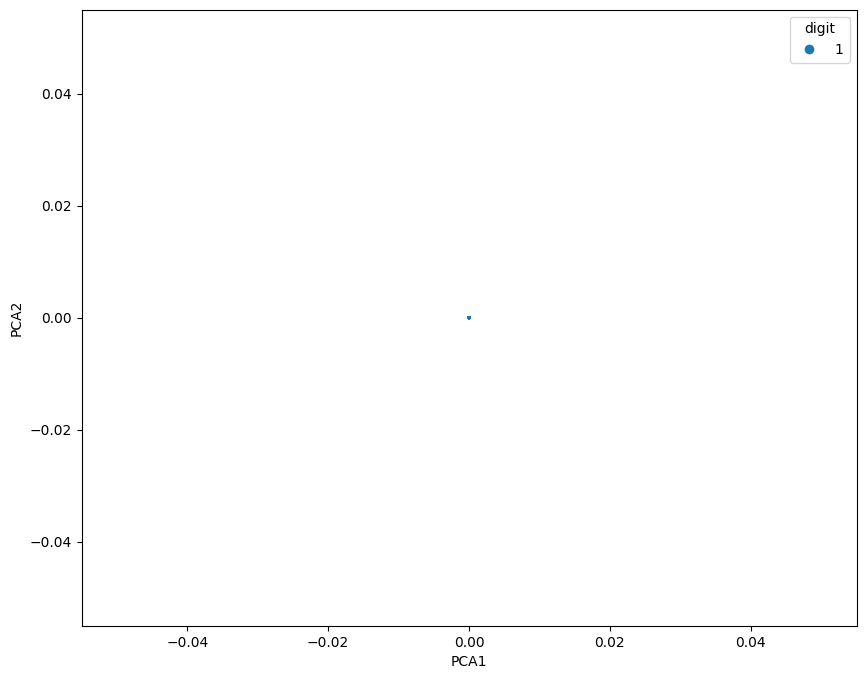

In [37]:
plt.figure(figsize=(10, 8))
# convert the labels to numbers, each will be assigned a separate color based on the cmap specified
colors = [int(x) for x in y_train]
sc = plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], s=1, c=colors, cmap='tab10')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(*sc.legend_elements(), title='digit')
plt.show()

## Further Evaluation with Cross-Validation

In [ ]:
lin_scores = cross_val_score(lin_reg, "DATA", "LABELS",
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)